# transport-network

## Introduction
This notebook calls functions from the repository to build an efficient subway network using a dataset from Paris network.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"]=7,7

## Data 


In [2]:
from data.data_preprocess import df_stations

This dataframe includes the 302 subway stations of the parisian network associated with their geographical localization and their trafic over a year.

In [3]:
df_stations.head(10)

,station,longitude,latitude,trafic
0,ABBESSES,2.338399,48.884400,2417881
1,ALESIA,2.326827,48.828066,5124204
2,ALEXANDRE-DUMAS,2.394554,48.856426,3666961
3,ALMA-MARCEAU,2.301251,48.864299,4204705
4,ANATOLE-FRANCE,2.285517,48.892019,3780611
5,ANVERS,2.344164,48.882872,6432199
6,ARGENTINE,2.289444,48.875672,2972019
7,ARTS-ET-METIERS,2.356108,48.865552,3908721
8,ASNIERES-GENNEVILLIERS LES COURTILLES,2.283761,48.930294,4033364
9,ASSEMBLEE NATIONALE,2.320310,48.861454,1126803


## Building the real network

In [20]:
x = [long for long in df_stations['longitude'].values]
y = [lat for lat in df_stations['latitude'].values]

m = len(df_stations)    

Without any tunnel between the stations, this is what the network looks like :

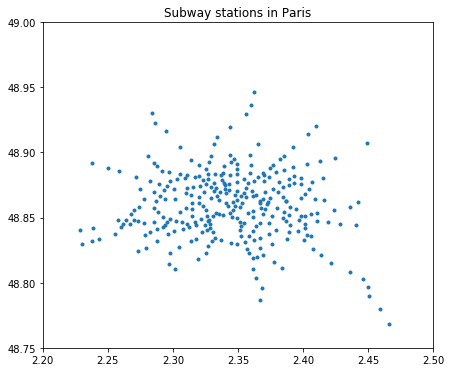

In [18]:
plt.xlim(2.2, 2.5)
plt.ylim(48.75, 49.0)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(x,y,marker='.')
plt.title('Subway stations in Paris')
plt.show()

In [8]:
import ast

with open('data/real_network.txt', encoding="utf-8") as file:
    real_network_structure = ast.literal_eval(file.read())

In [12]:
real_network_structure[:30]

['LA DEFENSE',
 'ESPLANADE DE LA DEFENSE',
 'PONT DE NEUILLY',
 'LES SABLONS',
 'PORTE MAILLOT',
 'ARGENTINE',
 'CHARLES DE GAULLE-ETOILE',
 'GEORGE V',
 'FRANKLIN-ROOSEVELT',
 'CHAMPS-ELYSEES-CLEMENCEAU',
 'CONCORDE',
 'TUILERIES',
 'PALAIS-ROYAL',
 'LOUVRE-RIVOLI',
 'CHATELET',
 'HOTEL DE VILLE',
 'SAINT-PAUL',
 'BASTILLE',
 'GARE DE LYON',
 'REUILLY-DIDEROT',
 'NATION',
 'PORTE DE VINCENNES',
 'SAINT-MANDE',
 'BERAULT',
 'CHATEAU DE VINCENNES',
 'END_OF_LINE',
 'PORTE DAUPHINE',
 'VICTOR HUGO',
 'CHARLES DE GAULLE-ETOILE',
 'TERNES']

In [21]:
from network_building import build_real_network, matrix_to_dic, display_graph

real_network_adj_matrix = build_real_network(real_network_structure)

for i in range(m):
     for j in range(m):
         if real_network_adj_matrix[i][j] == 0.0:
             real_network_adj_matrix[i][j], real_network_adj_matrix[j][i] = -1.0,-1.0
                
real_network_adj_dic = matrix_to_dic(real_network_adj_matrix)

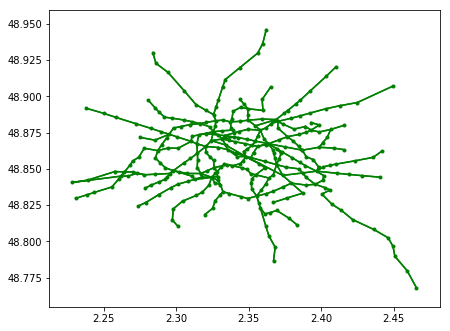

In [22]:
display_graph(real_network_adj_dic)